In [251]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [252]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [253]:
# Importación de pandas, archivo .csv
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [254]:
# Cantidad de filas y columnas
df.shape

(8523, 12)

In [255]:
# Tipos de datos en cada variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [256]:
# Buscar filas duplicadas
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [257]:
# Contar valores duplicados
# No existen valores duplicados
df.duplicated().sum()

0

In [258]:
# Identificar valores faltantes(nulos) por columna
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [259]:
# Total de valores faltantes
print(df.isna().sum().sum(), 'missing values')

3873 missing values


In [260]:
# Filtrar el conjunto de datos sólo para las filas a las que les falta al menos un valor y mostrar la forma
df[df.isna().any(axis=1)].shape

(3873, 12)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [262]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [263]:
# Codificación ordinal "Item_Fat_Content"
replacement_dictionary = {'Regular':1, 'reg':1, 'Low Fat':0, 'LF':0, 'low fat':0}
df['Item_Fat_Content'].replace(replacement_dictionary, inplace=True)
df['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int64

In [264]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [265]:
# Codificación ordinal "Outlet_Size"
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [266]:
# "Item_Outlet_Sales" es el objetivo y el resto de las variables conforman la matriz de características
# Se eliminan las variables que son identificadores
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
y = df['Item_Outlet_Sales']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [267]:
# instanciar los selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [268]:
# Instanciar transformadores
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [269]:
# Instanciar pipelines
# Numérico
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [270]:
# Categórico
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [271]:
# Instanciar
# Tuplas para columntransformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f341713f1c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3415d22170>)])

In [272]:
# Ajustar a datos 'train'
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f341713f1c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3415d22170>)])

In [273]:
# Transformar datos 'train' y 'test'
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [274]:
# Comprobar los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 29)




array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

In [275]:
X_train_proc = pd.DataFrame(X_train_processed)
X_train_proc

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.817249,-0.740321,-0.712775,1.828109,1.327849,0.407785,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,1.350766,-1.291052,0.603369,1.327849,0.407785,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.350766,1.813319,0.244541,0.136187,0.407785,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-0.740321,-1.004931,-0.952591,0.732018,-1.291630,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.740321,-0.965484,-0.336460,0.493686,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,1.350766,4.309657,-0.044657,0.017021,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.639356,-0.740321,1.008625,-1.058907,1.089517,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.740321,-0.920527,1.523027,0.493686,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.740321,-0.227755,-0.383777,1.089517,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [276]:
X_test_proc = pd.DataFrame(X_test_processed)
X_test_proc

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,3.310089e-01,-0.740321,-0.776646,-0.998816,-1.293807,2.107200,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.179892e+00,-0.740321,0.100317,-1.585194,-0.102145,-1.291630,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.784469e-01,1.350766,-0.482994,-1.595784,0.136187,0.407785,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.213344e-16,1.350766,-0.415440,0.506592,-1.532139,0.407785,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-6.426567e-01,1.350766,-1.047426,0.886725,0.732018,-1.291630,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,1.113736e+00,-0.740321,-1.134688,0.473646,-1.293807,2.107200,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2127,-6.426567e-01,-0.740321,-1.291052,0.018124,1.089517,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2128,-1.139570e+00,-0.740321,1.218324,1.093980,0.493686,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2129,-1.497727e+00,-0.740321,-0.778096,-0.366800,0.136187,0.407785,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


**Modelo de regresión lineal para la predicción de ventas**

In [277]:
# Importar el modelo
from sklearn.linear_model import LinearRegression

In [278]:
# Instanciar el modelo
reg = LinearRegression()

In [279]:
# Encajar modelo para que aprenda relación entre "x" e "y"
reg.fit(X_train_proc,y_train)

LinearRegression()

Evaluar el rendimiento del modelo

In [280]:
# Obtener los datos de R^2 después de ajustar nuestro modelo
train_score = reg.score(X_train_proc, y_train)
print(train_score)

0.5605660416716669


In [281]:
test_score = reg.score(X_test_proc, y_test)
print(test_score)

0.5658422861507393


In [282]:
# Obtener las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_proc)
# Obtener las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_proc)

In [283]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [284]:
# Coeficiente de determinación (r^2)
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [285]:
r2_train

0.5605660416716669

In [286]:
r2_test

0.5658422861507393

In [287]:
# Raíz del error cuadrático medio (RECM)
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [288]:
rmse_train

1140.3882386001144

In [289]:
rmse_test

1094.4547829107291

**Modelo de árbol de regresión para la predicción de ventas**

In [302]:
# Importar librerias
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [303]:
# Hacer una instancia del modelo
# Al dejar los paréntesis vacíos, estamos eligiendo utilizar todos los parámetros por defecto
dec_tree = DecisionTreeRegressor(random_state = 42)

In [315]:
# Ajustar el modelo usando los datos de entrenamiento
dec_tree.fit(X_train_proc, y_train)

DecisionTreeRegressor(random_state=42)

In [316]:
# Predecir los valores objetivos para el conjunto de entrenamiento y de prueba
train_preds = dec_tree.predict(X_train_proc)
test_preds = dec_tree.predict(X_test_proc)

In [317]:
# Evaluar el modelo
train_score = dec_tree.score(X_train_proc, y_train)
test_score = dec_tree.score(X_test_proc, y_test)
print(train_score)
print(test_score)

1.0
0.2010717942675806


In [318]:
# Coeficiente de determinación (r^2)
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [319]:
r2_train

1.0

In [320]:
r2_test

0.2010717942675806

In [321]:
# Raíz del error cuadrático medio (RECM)
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [322]:
rmse_train

5.50728349323243e-15

In [323]:
rmse_test

1484.663185441017

El modelo de regresión lineal es la mejor opción, no hay sobreajuste y la precisión es mejor que en el árbol de regresión. En este último modelo, podemos notar que sólo existe un buen ajuste para los datos de entrenamiento, sin embargo al aplicarlo en los datos de prueba los resultados nos indican que no se ajusta adecuadamente.

Para poder mejorar los resultados del modelo elegido, sería necesario agregar más información a la base de datos, con factores que tengan una mayor influencia en la variable que se busca predecir(Item_Outlet_Sales).

In [290]:
# Se completa los valores faltantes de la columna 'Item Weight', que es de tipo "float", utilizando la media de la columna
# Utilizar la media, tendrá más coherencia que reemplazar por "0", especialmente si hay que realizar cálculos que puedan incluir medidas de tendencia central, entre otros.
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [291]:
# La columna 'Outlet_Size' tiene tres posibles categorías: medium, small, high
df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [292]:
# Por el momento los datos de la columna 'Outlet_Size' se llenarán con una nueva categoría
# Utilizar la moda no es conveniente por la cantidad de datos faltantes, prácticamente se duplicaría los datos de una de las categorías
df['Outlet_Size'].fillna('Missing', inplace=True)

In [293]:
# Confirmar que ya no existen valores faltantes
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [294]:
# Buscar si hay alguna inconsistencia en las categorías de datos
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [295]:
# En la columna 'Item_Fat_Content' se repiten las mismas categorías, hay que unificarlas
# Regular y reg, son lo mismo, al igual que LF y low fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [296]:
# Obtener las estadísticas de las columnas numéricas
df.describe().round(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.35,0.07,140.99,1997.83,2181.29
std,4.23,0.48,0.05,62.28,8.37,1706.50
min,4.56,0.00,0.00,31.29,1985.00,33.29
25%,9.31,0.00,0.03,93.83,1987.00,834.25
50%,12.86,0.00,0.05,143.01,1999.00,1794.33
75%,16.00,1.00,0.09,185.64,2004.00,3101.30
max,21.35,1.00,0.33,266.89,2009.00,13086.96


In [297]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,0,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,1,0.000000,Baking Goods,51.4008,OUT018,2009,1.0,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,1,0.012741,Snack Foods,57.6588,OUT013,1987,2.0,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,0,0.127470,Snack Foods,107.7622,OUT027,1985,1.0,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,1,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,1,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


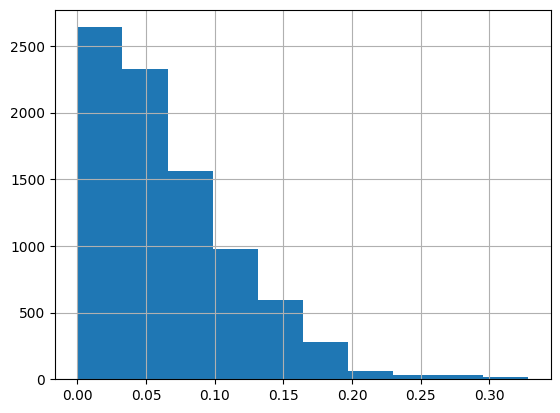

In [298]:
# Hacer un histograma y remover notación científica
df['Item_Visibility'].hist()
plt.ticklabel_format(useOffset=False, style='plain')

Podemos ver que la visibilidad de los items se encuentra en un rango de 0.00 a 0.33, por lo que en primera instancia se podría decir que hay una mayor frecuencia en productos con poca visibilidad.

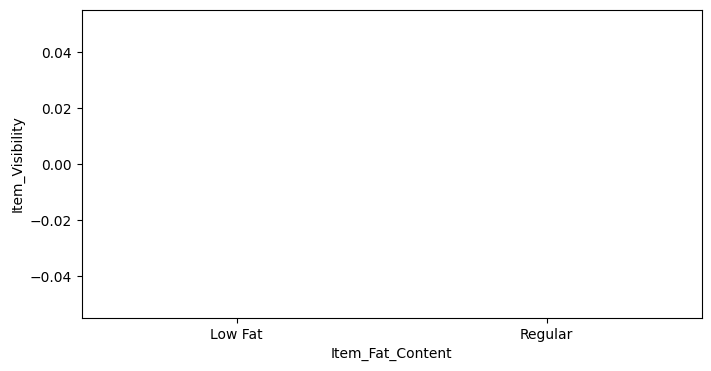

In [299]:
# Para analizar mejor la visibilidad, se genera un gráfico agregando una variable categórica
# Se genera estilo seaborn
# Se generan dos df, uno para cada filtro creado
# Se genera el boxplot
low_fat = df.loc[df['Item_Fat_Content']=='Low Fat','Item_Visibility']
regular = df.loc[df['Item_Fat_Content']=='Regular','Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4))
boxplots = axes.boxplot([low_fat,regular],
           notch = True,
           labels=['Low Fat', 'Regular'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# Se personaliza el gráfico
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item_Fat_Content', fontsize = 10);
plt.ylabel('Item_Visibility', fontsize = 10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

Se puede observar que no hay mucha diferencia en la distribución de los datos(visibilidad de los items) cuando el contenido de grasa es bajo o regular. Sin embargo existen algunos valores atípicos que se encuentran por encima del "máximo".

<ipython-input-300-25d31c46efb3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

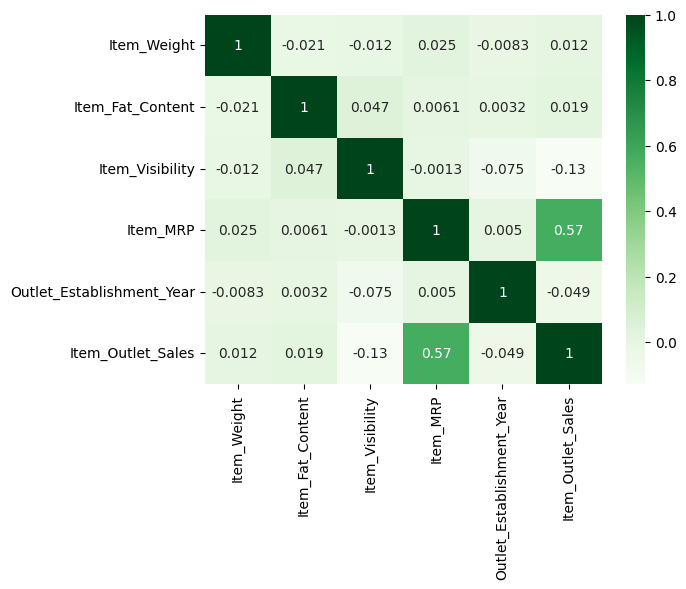

In [300]:
# Se agrega un mapa de calor, para hallar las correlaciones entre variables
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

Existe una correlación moderada entre las variables item_MRP e Item_Outlet_Sales. No se ha identificado ninguna relación entre las demás variables del conjunto de datos.